In [2]:
import pandas as pd
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import glob
from pathlib import Path
from random import shuffle
import sys
sys.path.append('../')
from methods.points.utils import draw_points

%matplotlib inline

# some colors
RED = [255, 0, 0]
GREEN = [0, 255, 0]
YELLOW = [255, 255, 0]
CYAN = [0, 255, 255]

DEFAULT_PALETTE = {
    0: GREEN,   # class0
    1: RED,     # class1
    2: YELLOW,  # class2
    3: CYAN     # class3
}

FIG_SIZE = (100, 25)

DATA_NAME = 'nuclei'   # mbm, vgg, dcc, nuclei, bcd, hela, psu, adipocyte
PATH = Path("./{}-cells".format(DATA_NAME))       # path containing imgs folder

RADIUS = 9     # MBM=10, VGG=6, DCC=15, NUCLEI=9, BCD=15, HeLa=12, PSU=12, ADIPOCYTE=5
NUM_SAMPLES = 5     # put to 1 for datasets with images having different sizes (dcc)

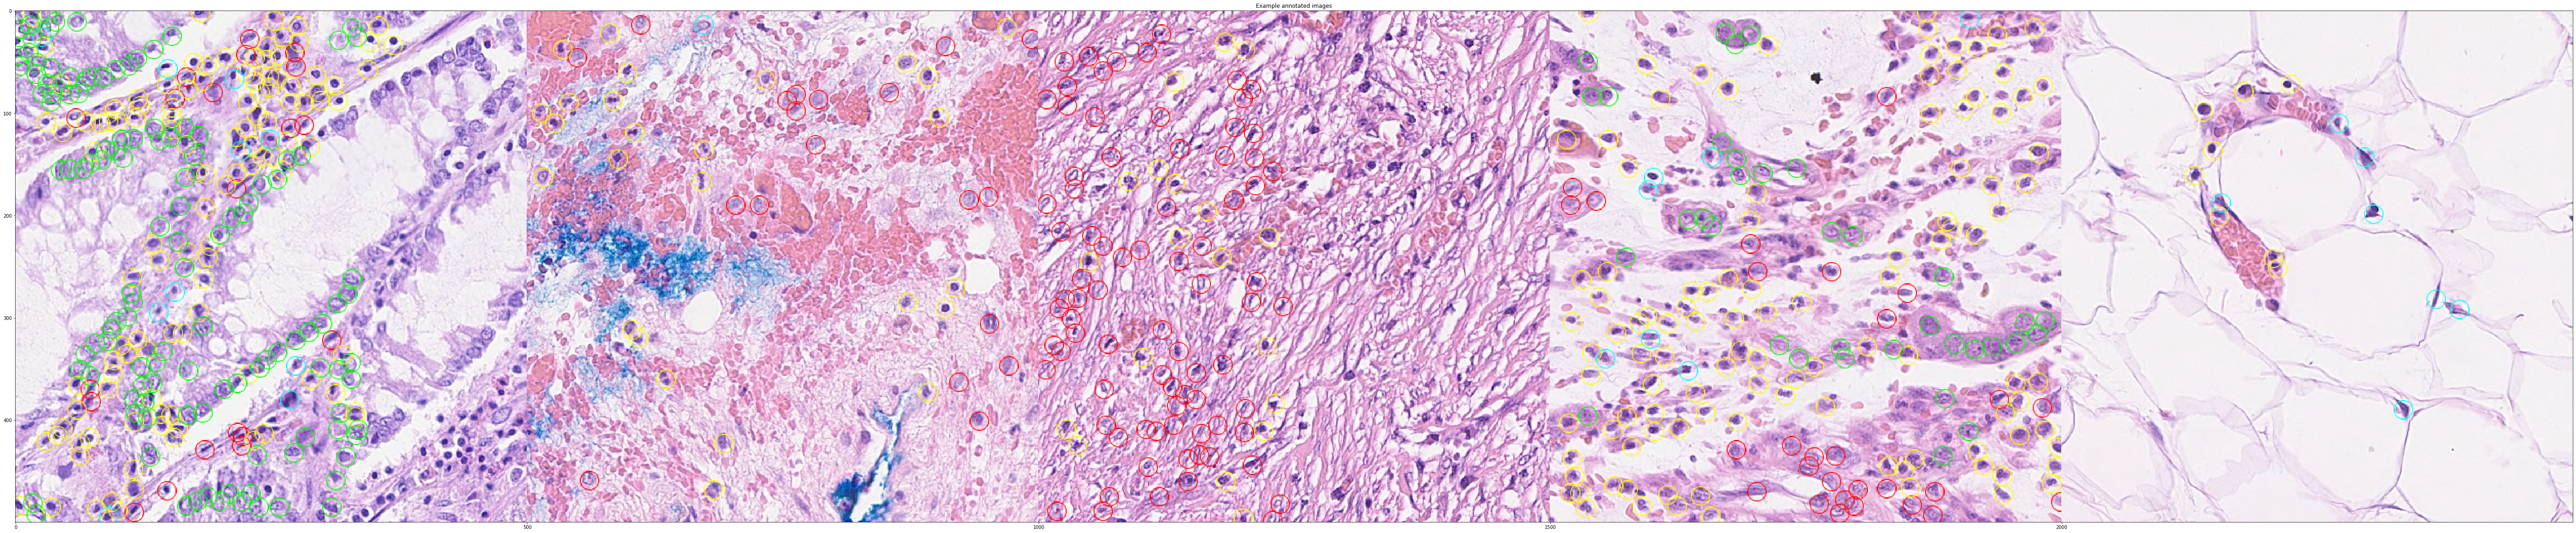

In [3]:
image_paths = PATH.glob('imgs/*.[pjbpj][npmgp][ggpme]*')
image_paths = list(image_paths)
shuffle(image_paths)
image_paths = image_paths[0:NUM_SAMPLES]
#print(image_paths)

annot_csv_file = PATH / 'annotations.csv'
annot_df = pd.read_csv(annot_csv_file)
classes = annot_df['class'].unique()
annot_df = annot_df.set_index(['imgName'])

image_to_show = []
for img_path in image_paths:
    image = io.imread(img_path).astype(np.float32)
    if img_path.name in annot_df.index:
        annot_image_df = annot_df.loc[img_path.name]
        for cl in classes:
            cl_colour = DEFAULT_PALETTE[cl]
            cl_annot_image_df = annot_image_df.loc[annot_image_df['class'] == cl]
            cl_annot_image_yx = cl_annot_image_df[['Y' , 'X' ]].values
            image = draw_points(image, cl_annot_image_yx, radius=RADIUS, color=cl_colour)
    # io.imsave('trash/debug/annot' + img_path.name, annot_image)
    else:
        print("Image non present in annotation csv file.")
        exit(1)
    image_to_show.append(image)
    
plt.rcParams['figure.figsize'] = FIG_SIZE
plt.title("Example annotated images")
plt.imshow(np.concatenate(image_to_show).astype(np.uint8).transpose((1,0,2)), interpolation='none')

